In [2]:
import pandas as pd
df=pd.read_csv('C:\\workplace\\Give-Me-Some-Credit\\datasets\\cs-training.csv',index_col=0)
df.shape

(150000, 11)

In [3]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df['SeriousDlqin2yrs'].value_counts(normalize=True)

SeriousDlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64

# Section 1: Missing variables

In [5]:
df.isna().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

In [6]:
df[['MonthlyIncome','NumberOfDependents']]

,MonthlyIncome,NumberOfDependents
1,9120.0,2.0
2,2600.0,1.0
3,3042.0,0.0
4,3300.0,0.0
5,63588.0,0.0
...,...,...
149996,2100.0,0.0
149997,5584.0,2.0
149998,NaN,0.0
149999,5716.0,0.0


# Section 2: differentiating between categorical and numerical features

In [7]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [9]:
num_f=[]
cat_f=[]

## Section 2_1: RevolvingUtilizationOfUnsecuredLines

In [10]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [11]:
df['RevolvingUtilizationOfUnsecuredLines'].unique()

array([0.76612661, 0.95715102, 0.65818014, ..., 0.29974515, 0.24604392,
       0.85028295])

<Axes: >

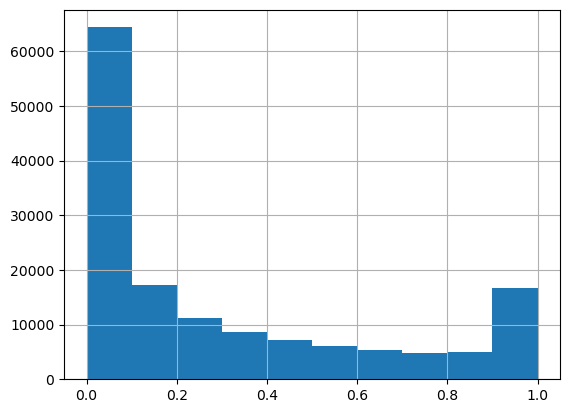

In [12]:
df.loc[df['RevolvingUtilizationOfUnsecuredLines']<=1,'RevolvingUtilizationOfUnsecuredLines'].hist()

In [13]:
len(df.loc[df['RevolvingUtilizationOfUnsecuredLines']>1,'RevolvingUtilizationOfUnsecuredLines'])

3321

<Axes: xlabel='SeriousDlqin2yrs', ylabel='RevolvingUtilizationOfUnsecuredLines'>

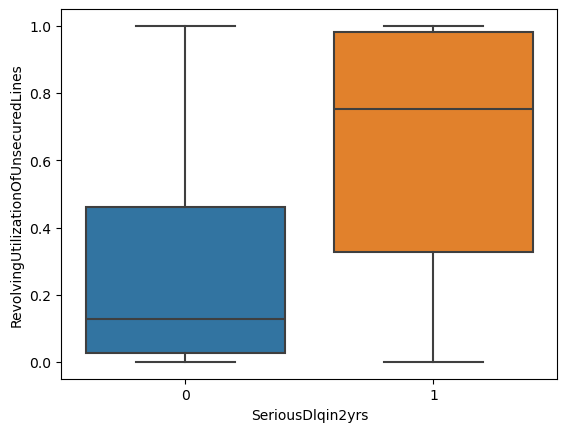

In [14]:
import seaborn as sns
sns.boxplot(df[df['RevolvingUtilizationOfUnsecuredLines']<1],x='SeriousDlqin2yrs',y='RevolvingUtilizationOfUnsecuredLines')

<Axes: xlabel='SeriousDlqin2yrs', ylabel='RevolvingUtilizationOfUnsecuredLines'>

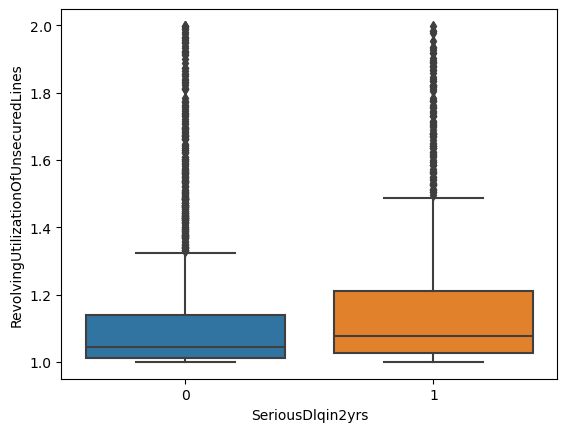

In [15]:
sns.boxplot(df[(df['RevolvingUtilizationOfUnsecuredLines']>1) & (df['RevolvingUtilizationOfUnsecuredLines']<2)],x='SeriousDlqin2yrs',y='RevolvingUtilizationOfUnsecuredLines')

<Axes: xlabel='SeriousDlqin2yrs', ylabel='RevolvingUtilizationOfUnsecuredLines'>

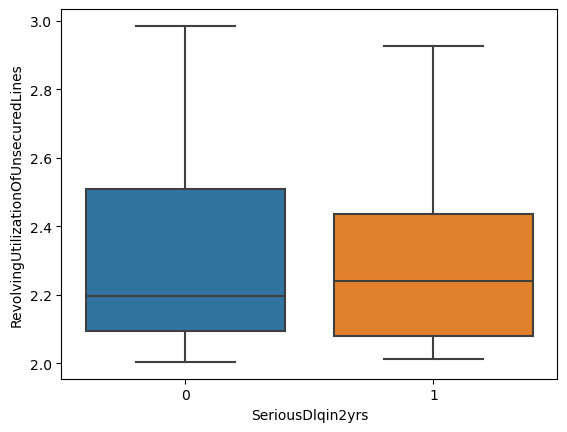

In [16]:
sns.boxplot(df[(df['RevolvingUtilizationOfUnsecuredLines']>2) & (df['RevolvingUtilizationOfUnsecuredLines']<3)],x='SeriousDlqin2yrs',y='RevolvingUtilizationOfUnsecuredLines')

<Axes: xlabel='SeriousDlqin2yrs', ylabel='RevolvingUtilizationOfUnsecuredLines'>

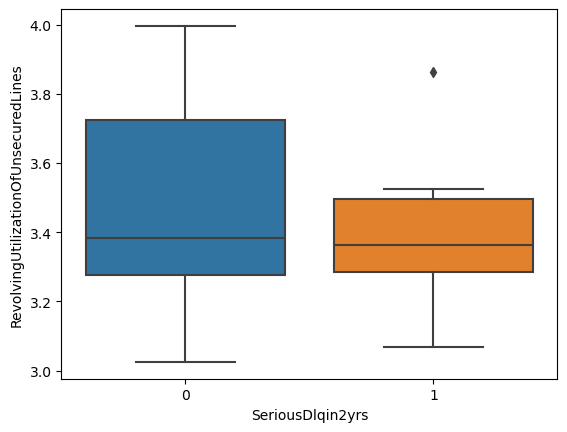

In [17]:
sns.boxplot(df[(df['RevolvingUtilizationOfUnsecuredLines']>3) & (df['RevolvingUtilizationOfUnsecuredLines']<4)],x='SeriousDlqin2yrs',y='RevolvingUtilizationOfUnsecuredLines')

In [18]:
len(df[df['RevolvingUtilizationOfUnsecuredLines']>4])

264

This feature is a numerical features.

In [19]:
num_f.append('RevolvingUtilizationOfUnsecuredLines')
num_f

['RevolvingUtilizationOfUnsecuredLines']

## Section 2.2: Age

<Axes: >

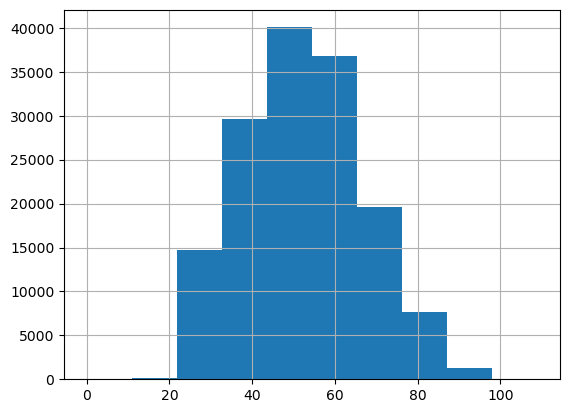

In [20]:
df['age'].hist()

In [21]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

<Axes: xlabel='SeriousDlqin2yrs', ylabel='age'>

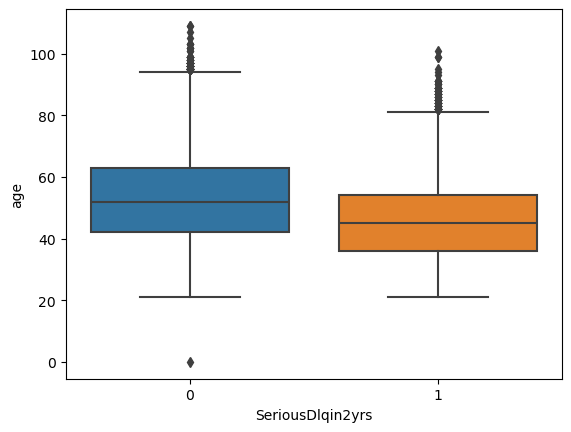

In [22]:
sns.boxplot(df,y='age',x='SeriousDlqin2yrs')

In [23]:
num_f.append('age')
num_f

['RevolvingUtilizationOfUnsecuredLines', 'age']

## Section 2.3: `NumberOfTime30-59DaysPastDueNotWorse`

In [24]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [25]:
pd.Series(df['NumberOfTime30-59DaysPastDueNotWorse'].unique()).sort_values()

1      0
2      1
0      2
3      3
4      4
5      5
8      6
6      7
11     8
12     9
7     10
15    11
10    12
14    13
13    96
9     98
dtype: int64

In [26]:
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: count, dtype: int64

In [27]:
cat_f.append('NumberOfTime30-59DaysPastDueNotWorse')
cat_f

['NumberOfTime30-59DaysPastDueNotWorse']

In [28]:
df.loc[df['NumberOfTime30-59DaysPastDueNotWorse']>=3,'NumberOfTime30-59DaysPastDueNotWorse']=3
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0    126018
1     16033
2      4598
3      3351
Name: count, dtype: int64

## Section 2.4: `DebtRatio`

<Axes: xlabel='SeriousDlqin2yrs', ylabel='DebtRatio'>

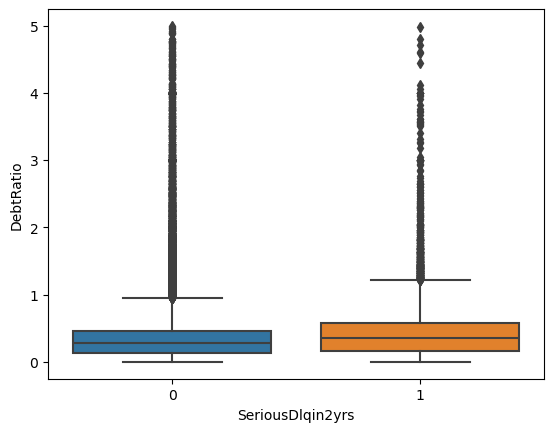

In [29]:
import seaborn as sns 
sns.boxplot(df[df['DebtRatio']<5],y='DebtRatio',x='SeriousDlqin2yrs')

In [30]:
num_f.append('DebtRatio')
num_f

['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio']

## Section 2.5: `MonthlyIncome`

<Axes: xlabel='SeriousDlqin2yrs', ylabel='MonthlyIncome'>

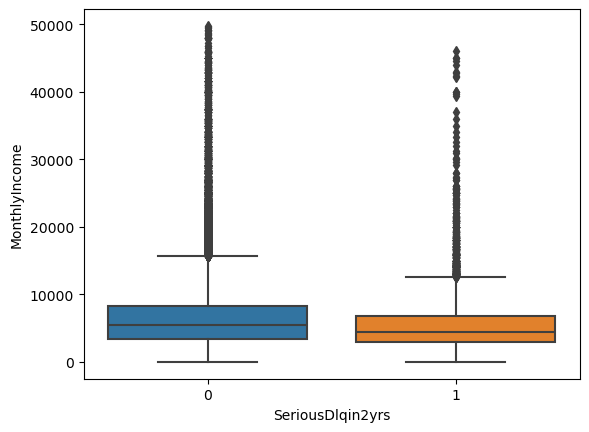

In [31]:
sns.boxplot(df[df['MonthlyIncome']<50000],y='MonthlyIncome',x='SeriousDlqin2yrs')

In [32]:
num_f.append('MonthlyIncome')
num_f

['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome']

In [33]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

## Section 2.6: `NumberOfOpenCreditLinesAndLoans`

In [34]:
df['NumberOfOpenCreditLinesAndLoans'].unique()

array([13,  4,  2,  5,  7,  3,  8,  9,  6, 10, 14, 22, 17,  1, 15, 31, 12,
       21, 11, 19, 18, 26, 20, 23,  0, 16, 27, 29, 28, 24, 25, 32, 46, 33,
       30, 34, 37, 38, 36, 35, 54, 43, 45, 49, 57, 48, 40, 58, 51, 52, 39,
       41, 56, 42, 47, 50, 44, 53], dtype=int64)

In [35]:
df['NumberOfOpenCreditLinesAndLoans'].value_counts()

NumberOfOpenCreditLinesAndLoans
6     13614
7     13245
5     12931
8     12562
4     11609
9     11355
10     9624
3      9058
11     8321
12     7005
2      6666
13     5667
14     4546
1      4438
15     3645
16     3000
17     2370
0      1888
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
38       13
40       10
39        9
42        8
45        8
43        8
37        7
48        6
49        4
54        4
41        4
52        3
46        3
57        2
51        2
56        2
47        2
50        2
44        2
58        1
53        1
Name: count, dtype: int64

<Axes: xlabel='SeriousDlqin2yrs', ylabel='NumberOfOpenCreditLinesAndLoans'>

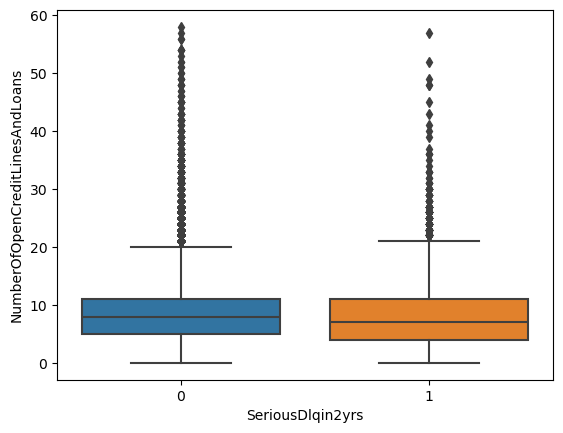

In [36]:
sns.boxplot(df,y='NumberOfOpenCreditLinesAndLoans',x='SeriousDlqin2yrs')

In [37]:
num_f.append('NumberOfOpenCreditLinesAndLoans')
num_f

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans']

## Section 2.7: `NumberOfTimes90DaysLate`

In [38]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [39]:
df['NumberOfTimes90DaysLate'].value_counts()

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: count, dtype: int64

In [40]:
cat_f.append('NumberOfTimes90DaysLate')
cat_f

['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']

In [41]:
df.loc[df['NumberOfTimes90DaysLate']>=3,'NumberOfTimes90DaysLate']=3
df['NumberOfTimes90DaysLate'].value_counts()

NumberOfTimes90DaysLate
0    141662
1      5243
2      1555
3      1540
Name: count, dtype: int64

## Section 2.8: `NumberRealEstateLoansOrLines`

In [42]:
df['NumberRealEstateLoansOrLines'].value_counts()

NumberRealEstateLoansOrLines
0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
15        7
14        7
17        4
16        4
25        3
18        2
23        2
19        2
20        2
26        1
54        1
21        1
29        1
32        1
Name: count, dtype: int64

In [43]:
cat_f.append('NumberRealEstateLoansOrLines')
cat_f

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines']

In [44]:
df['NumberRealEstateLoansOrLines'].value_counts()

NumberRealEstateLoansOrLines
0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
15        7
14        7
17        4
16        4
25        3
18        2
23        2
19        2
20        2
26        1
54        1
21        1
29        1
32        1
Name: count, dtype: int64

In [45]:
df.loc[df['NumberRealEstateLoansOrLines']>=4,'NumberRealEstateLoansOrLines']=4
df['NumberRealEstateLoansOrLines'].value_counts()

NumberRealEstateLoansOrLines
0    56188
1    52338
2    31522
3     6300
4     3652
Name: count, dtype: int64

## Section 2.9: `NumberOfTime60-89DaysPastDueNotWorse`

In [46]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: count, dtype: int64

In [47]:
df.loc[df['NumberOfTime60-89DaysPastDueNotWorse']>=3,'NumberOfTime60-89DaysPastDueNotWorse']=3
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0    142396
1      5731
2      1118
3       755
Name: count, dtype: int64

In [48]:
cat_f.append('NumberOfTime60-89DaysPastDueNotWorse')
cat_f

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse']

## Section 2.10: `NumberOfDependents`

In [49]:
df['NumberOfDependents'].value_counts()

NumberOfDependents
0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

In [50]:
df.loc[df['NumberOfDependents']>=4,'NumberOfDependents']=4

In [51]:
df['NumberOfDependents'].value_counts()

NumberOfDependents
0.0    86902
1.0    26316
2.0    19522
3.0     9483
4.0     3853
Name: count, dtype: int64

In [52]:
cat_f.append('NumberOfDependents')
cat_f

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

# Section 3: Train and Test split

In [53]:
import numpy as np 
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [54]:
y.value_counts(normalize=True)

SeriousDlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=1400)

- Scaling the dataset:

In [56]:
from sklearn.preprocessing import PowerTransformer 
pw= PowerTransformer().fit(X_train[num_f])

In [57]:
X_train[num_f]

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans
7077,0.002126,64,0.175153,5400.0,5
115179,0.027197,55,0.260741,14500.0,10
43286,0.006193,41,14508.000000,NaN,7
126550,0.021277,90,0.007094,3100.0,6
16311,1.000000,47,424.000000,NaN,1
...,...,...,...,...,...
121399,0.295062,24,0.094070,4400.0,6
127677,0.009458,83,32.000000,NaN,24
46028,0.022166,79,0.004475,4245.0,4
120863,0.009142,75,621.000000,NaN,3


In [58]:
pw.transform(X_train[num_f])

array([[-1.15733553,  0.80849958, -0.65218519, -0.00498613, -0.59713988],
       [-0.97902922,  0.23182216, -0.53313648,  1.43853216,  0.46128941],
       [-1.12747154, -0.73809778,  1.99238289,         nan, -0.12408207],
       ...,
       [-1.01372835,  1.70866551, -0.93852967, -0.2881271 , -0.87207906],
       [-1.10605244,  1.47513065,  1.95407271,         nan, -1.18446264],
       [ 1.15023449,  0.49200263, -0.22961437,  0.32791852,  2.11136338]])

In [59]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
scaler=MinMaxScaler().fit(X_train[num_f])
X_train_num=scaler.transform(X_train[num_f])
X_test_num=scaler.transform(X_test[num_f])

In [60]:
ohe=OneHotEncoder().fit(X_train[cat_f])
X_train_cat=ohe.transform(X_train[cat_f]).toarray()
X_test_cat=ohe.transform(X_test[cat_f]).toarray()

- Handling the missing variables.

In [61]:
X_train2=np.concatenate((X_train_cat,X_train_num),axis=1)
X_test2=np.concatenate((X_test_cat,X_test_num),axis=1)

In [62]:
from sklearn.impute import KNNImputer 
knn_imputer=KNNImputer().fit(X_train2)
X_train2=knn_imputer.transform(X_train2)
X_test2=knn_imputer.transform(X_test2)

In [63]:
le=LabelEncoder().fit(y_train)
y_train2=le.transform(y_train)
y_test2=le.transform(y_test)

# Section 3: Saving the processed datasets

In [65]:
X_train2.shape,y_train2.shape

((120000, 28), (120000,))

In [70]:
train_df=pd.DataFrame(np.concatenate((X_train2,y_train2.reshape((-1,1))),axis=1))
train_df_col=['feature_{}'.format(i) for i in range(28)]+['target']
train_df.columns=[train_df_col]
train_df.to_csv('C:\\workplace\\Give-Me-Some-Credit\\datasets\\processed_dataset\\train_df.csv')

In [71]:
test_df=pd.DataFrame(np.concatenate((X_test2,y_test2.reshape((-1,1))),axis=1))
test_df_col=['feature_{}'.format(i) for i in range(28)]+['target']
test_df.columns=[test_df_col]
test_df.to_csv('C:\\workplace\\Give-Me-Some-Credit\\datasets\\processed_dataset\\test_df.csv')

# Section 4: Bench Mark model

## Section 4.1: Balancing data

In [ ]:
train_np2=np.concatenate((X_train2,y_train2.reshape((-1,1))),axis=1)

In [ ]:
from sklearn.utils import resample
def make_balance(fit_df):
    fit_df_0=fit_df[fit_df[:,-1]==0]
    fit_df_1=fit_df[fit_df[:,-1]==1]
    max_count=np.floor(len(fit_df_0)/len(fit_df_1))
    residuals=int(len(fit_df_0)-max_count*len(fit_df_1))
    balance_count=1
    fit_df2=np.array(pd.DataFrame(fit_df_1).copy())
    while balance_count<max_count:
        fit_df2=np.concatenate((fit_df2,fit_df_1))
        balance_count=balance_count+1
    fit_df2=np.concatenate((fit_df2,resample(fit_df_1,replace=False,n_samples=residuals)))
    fit_df2=np.concatenate((fit_df2,fit_df_0))
    fit_df2=resample(fit_df2,replace=False,n_samples=len(fit_df2))
    return fit_df2

## Section 4.2: Hyperparameter tuning

In [ ]:
fit_np2,val_np2=train_test_split(train_np2,test_size=0.3,stratify=train_np2[:,-1])

In [ ]:
fit_np3=make_balance(fit_np2)
X_fit3=fit_np3[:,:-1]
y_fit3=fit_np3[:,-1]
val_np3=make_balance(val_np2)
X_val3=val_np3[:,:-1]
y_val3=val_np3[:,-1]

In [ ]:
from xgboost import XGBClassifier 
model=XGBClassifier(objective='binary:logistic',eval_metric=['error'],
                    n_jobs=-1,tree_method='hist',early_stopping_rounds=50,
                    n_estimators=10000,max_depth=3,learning_rate=0.1).fit(X_fit3,y_fit3,eval_set=[(X_val3,y_val3)])

In [ ]:
model.best_iteration

## Section 4.3: Training the model

In [ ]:
train_np3=make_balance(train_np2)
X_train3=train_np3[:,:-1]
y_train3=train_np3[:,-1]

In [ ]:
model=XGBClassifier(objective='binary:logistic',
                    n_jobs=-1,tree_method='hist',
                    n_estimators=model.best_iteration,max_depth=3,learning_rate=0.1).fit(X_train3,y_train3)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [ ]:
confusion_matrix(y_test,model.predict(X_test2))

In [ ]:
roc_auc_score(y_test,model.predict(X_test2))

In [ ]:
#define metrics
import matplotlib.pyplot as plt
y_pred_proba = model.predict_proba(X_test2)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
accuracy_score(y_test,model.predict(X_test2))